<a href="https://colab.research.google.com/github/NileshCT/Linear_Regression_Modelling/blob/main/Linear_Regression_Model_using_household_power_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt",sep=";")

<ipython-input-2-9c7b044435ee>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt",sep=";")


In [3]:
#Displaying random 5 records.
df.sample(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
193599,30/4/2007,04:03:00,?,?,?,?,?,?,NaN
776611,8/6/2008,00:55:00,0.232,0.000,237.320,1.000,0.000,0.000,1.0
46811,18/1/2007,05:35:00,0.212,0.000,242.040,0.800,0.000,0.000,0.0
1053545,17/12/2008,08:29:00,1.522,0.102,242.640,6.200,1.000,0.000,18.0
636365,2/3/2008,15:29:00,1.364,0.108,238.090,5.600,0.000,1.000,0.0


In [4]:
#Display top five.
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
#Display last five records.
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [6]:
df.describe(include="all")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2.049280e+06
unique,1442,1440,6534,896,5168,377,153,145,NaN
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000,NaN
freq,1440,1442,25979,472786,25979,169406,1840611,1408274,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.437154e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [8]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [9]:
#Displaying all columns.
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [10]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [11]:
#Displaying total rows and columns.
df.shape

(2075259, 9)

In [12]:
#Displaying total number of columns.
df.shape[1]

9

In [13]:
#step 2 cleaning process

In [14]:
#Displaying all null values.
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [15]:
#Dropped unwanted columns ie date and time.
df.drop(["Date","Time"],axis=1,inplace=True)

In [16]:
gk=df.describe(include=object)
gk

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259
unique,6534,896,5168,377,153,145
top,?,0.000,?,1.000,0.000,0.000
freq,25979,472786,25979,169406,1840611,1408274


In [17]:
#Replace ? marks with nan values.
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [19]:
#Here replacing nan values with median values of Global_active_power columns.
df['Global_active_power']=df['Global_active_power'].replace(np.nan,df['Global_active_power'].median())

In [20]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


array([[<Axes: title={'center': 'Sub_metering_3'}>]], dtype=object)

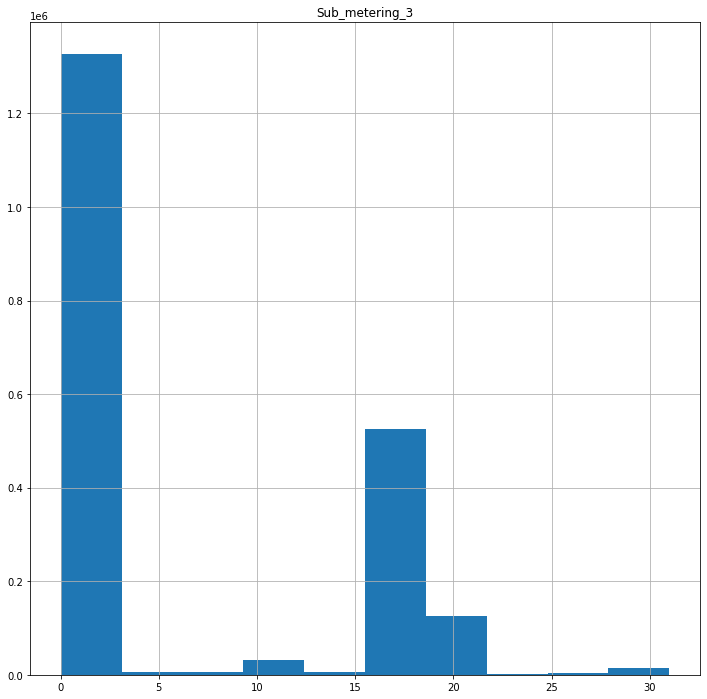

In [21]:
df.hist(figsize=(12,12))


<ipython-input-110-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


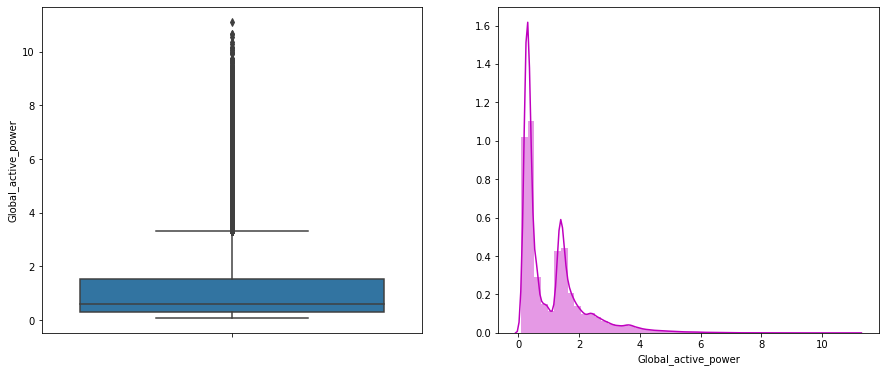

<ipython-input-110-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


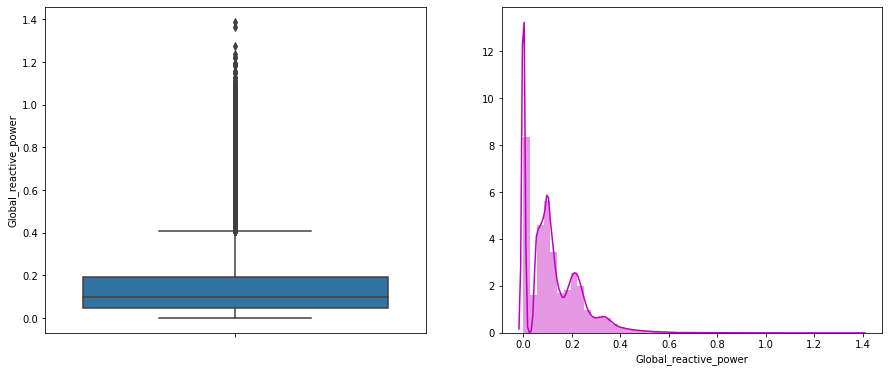

<ipython-input-110-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


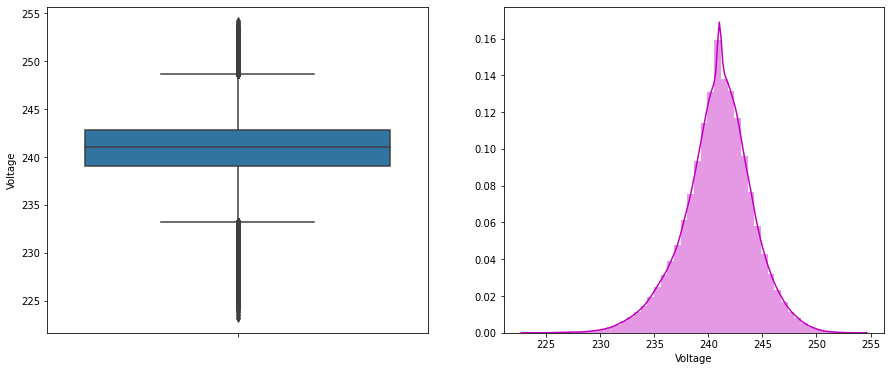

<ipython-input-110-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


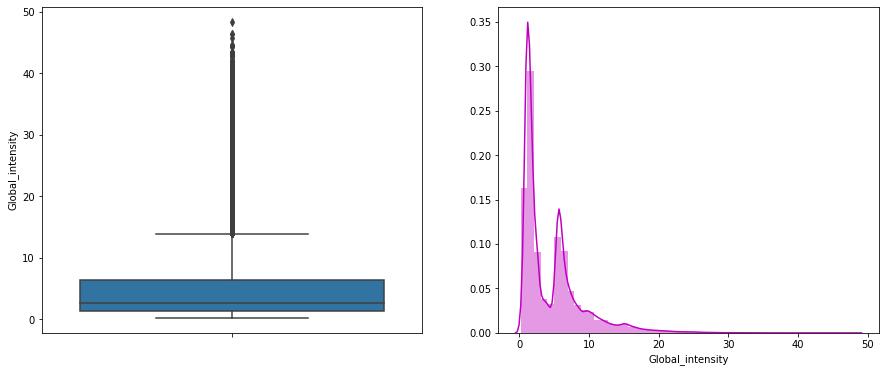

<ipython-input-110-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


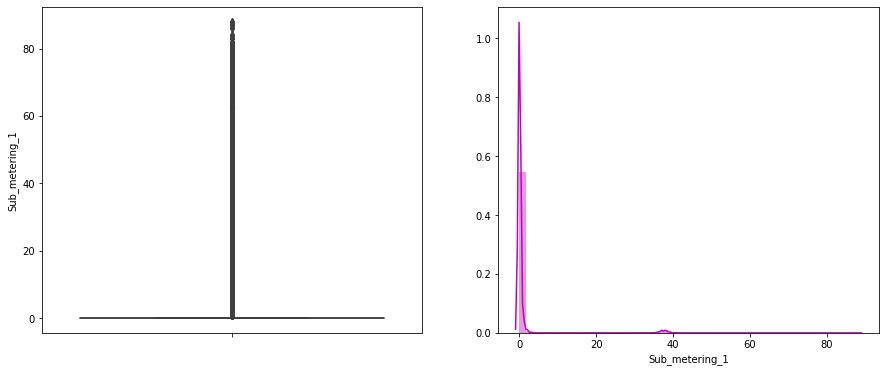

<ipython-input-110-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


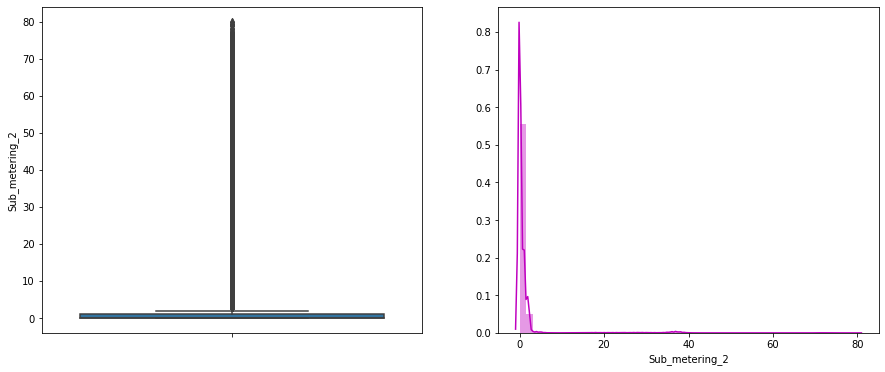

<ipython-input-110-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


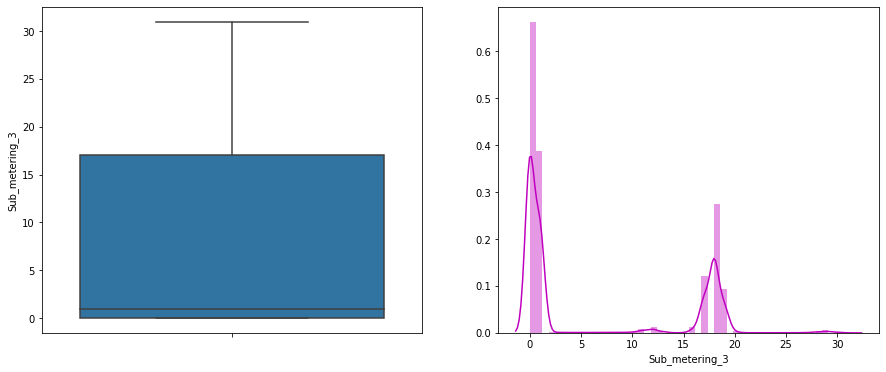

<ipython-input-110-023c0a9f21b3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


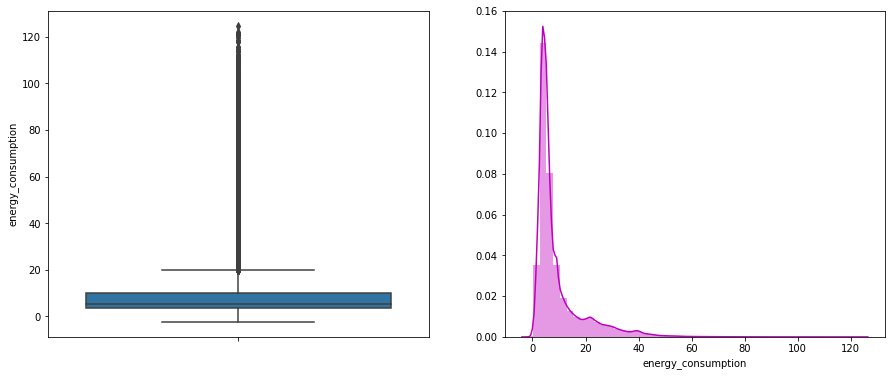

In [110]:
#Box plot with distplot 
numeric_features =df.describe().columns
numeric_features

for var in numeric_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna(),color="m")
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

In [26]:
df['Global_intensity'].median()

2.6

In [66]:
import numpy as np
from scipy import median
# mode1 = np.median()
# mode1


TypeError: ignored

In [63]:
# a=df["Global_intensity"].values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 110.8+ MB


In [24]:
#we replaced all null values using the median values.
for i in gk:
  df[i]=df[i].replace(np.nan,df[i].median())
  print(df[i])


0          4.216
1          5.360
2          5.374
3          5.388
4          3.666
           ...  
2075254    0.946
2075255    0.944
2075256    0.938
2075257    0.934
2075258    0.932
Name: Global_active_power, Length: 2075259, dtype: object
0          0.418
1          0.436
2          0.498
3          0.502
4          0.528
           ...  
2075254      0.0
2075255      0.0
2075256      0.0
2075257      0.0
2075258      0.0
Name: Global_reactive_power, Length: 2075259, dtype: object
0          234.840
1          233.630
2          233.290
3          233.740
4          235.680
            ...   
2075254     240.43
2075255      240.0
2075256     239.82
2075257      239.7
2075258     239.55
Name: Voltage, Length: 2075259, dtype: object
0          18.400
1          23.000
2          23.000
3          23.000
4          15.800
            ...  
2075254       4.0
2075255       4.0
2075256       3.8
2075257       3.8
2075258       3.8
Name: Global_intensity, Length: 2075259, dtype: object


In [74]:
df['Sub_metering_3']=df['Sub_metering_3'].replace(np.nan,df['Sub_metering_3'].median())

In [75]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

<Axes: >

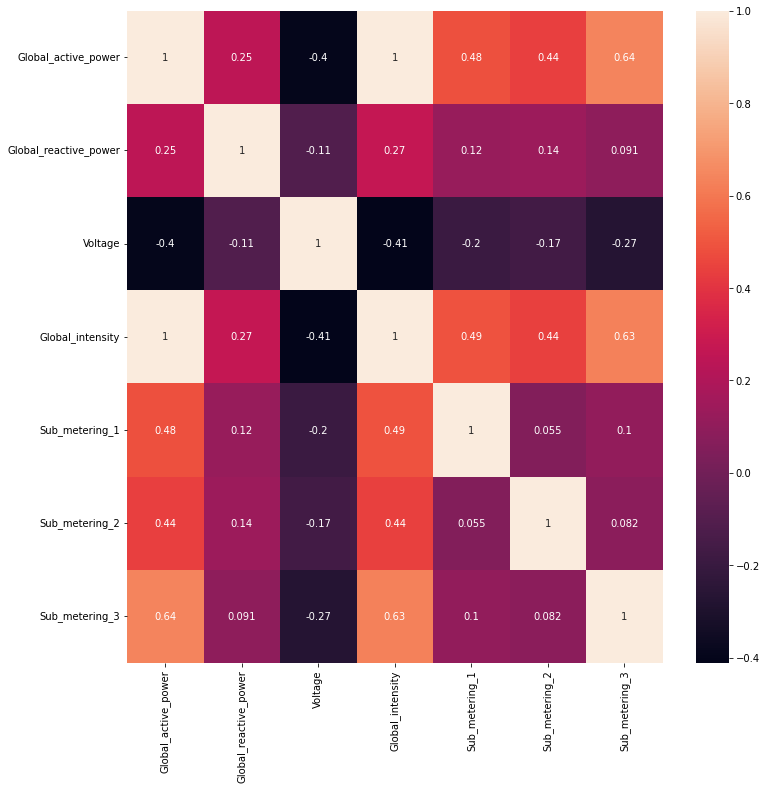

In [76]:
plt.figure(figsize=(12,12))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 110.8 MB


In [78]:
#Here we have converted all object dtypes to flat datatypes using this for loop.
for i in gk:
  df[i]=df[i].astype("float")
  print(df[i].dtypes)

float64
float64
float64
float64
float64
float64


In [79]:
#code to convert object to float
df["Global_active_power"]= df["Global_active_power"].astype('float64')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 110.8 MB


In [84]:
# # List to append calculations to
# energy_consumption= []

# # Iterate over dataframe
# for index, row in df.iterrows():
#     # If even, no remainder after division by 2
#     if (index % 2) == 0:
#         # Get relevant data by locating at current index position +1
#         calc = (df.loc[index+1,"Global_active_power"]* 1000/60) - (df.loc[index+1,"Sub_metering_1"]+df.loc[index+1,"Sub_metering_2"]+df.loc[index+1,"Sub_metering_3"])
#     else:
#         # Get relevant data by locating at current index position -1
#         calc = (df.loc[index+1,"Global_active_power"]* 1000/60) - (df.loc[index+1,"Sub_metering_1"]+df.loc[index+1,"Sub_metering_2"]+df.loc[index+1,"Sub_metering_3"])

#     # Append calculation to list
#     energy_consumption.append(calc)

# # Create new column from list
# df["energy_consumption"] = energy_consumption

In [87]:
df["Global_active_power"].count()

2075259

In [88]:
df['energy_consumption']=(df["Global_active_power"] * 1000/60) - (df["Sub_metering_1"]+df["Sub_metering_2"]+df["Sub_metering_3"])

In [89]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumption
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.085486e+00,1.234176e-01,2.408420e+02,4.602375e+00,1.107879e+00,1.282265e+00,6.390116e+00,9.311171e+00
std,1.052065e+00,1.120452e-01,3.219699e+00,4.422241e+00,6.115669e+00,5.787271e+00,8.406114e+00,9.525778e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833333e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.566667e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.023333e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [92]:
#Displaying of values from dependent values.
df['energy_consumption']

0          52.266667
1          72.333333
2          70.566667
3          71.800000
4          43.100000
             ...    
2075254    15.766667
2075255    15.733333
2075256    15.633333
2075257    15.566667
2075258    15.533333
Name: energy_consumption, Length: 2075259, dtype: float64

In [94]:
#calculation of VIF values.
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df[[i for i in df.describe().columns if i not in ['energy_consumption']]])

,variables,VIF
0,Global_active_power,1271.005805
1,Global_reactive_power,2.898039
2,Voltage,3.066629
3,Global_intensity,1276.514062
4,Sub_metering_1,1.662236
5,Sub_metering_2,1.570307
6,Sub_metering_3,3.628081


<Axes: >

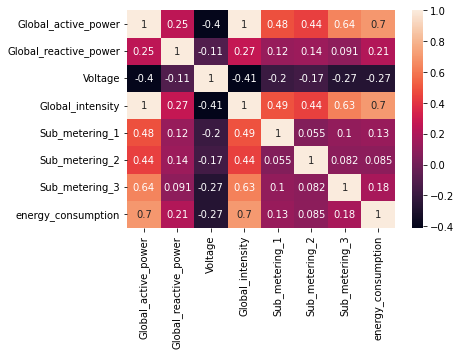

In [99]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
#another code for calculating vif values
# X=
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = df1.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
#                           for i in range(len(df1.columns))]
  
# print(vif_data)

In [106]:
df1=df.copy()

In [107]:
#Here i dropped one feature because it showed 
df1.drop(['Global_intensity'],axis=1,inplace=True)

In [108]:
#Following result is not showing multicollinearity after dropping global intensity.all values are below 10.
#calculation of VIF values.
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df1[[i for i in df1.describe().columns if i not in ['energy_consumption']]])

,variables,VIF
0,Global_active_power,7.572018
1,Global_reactive_power,2.378081
2,Voltage,3.060752
3,Sub_metering_1,1.651922
4,Sub_metering_2,1.558518
5,Sub_metering_3,3.438222


In [111]:
#min max scaling method.
#here applying min max scaling on dataframe.
#applying min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[['Global_active_power','Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']] = scaler.fit_transform(df1[['Global_active_power','Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']])
df1.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,energy_consumption
0,0.374796,0.300719,0.376090,0.0,0.0125,0.548387,52.266667
1,0.478363,0.313669,0.336995,0.0,0.0125,0.516129,72.333333
2,0.479631,0.358273,0.326010,0.0,0.0250,0.548387,70.566667
3,0.480898,0.361151,0.340549,0.0,0.0125,0.548387,71.800000
4,0.325005,0.379856,0.403231,0.0,0.0125,0.548387,43.100000


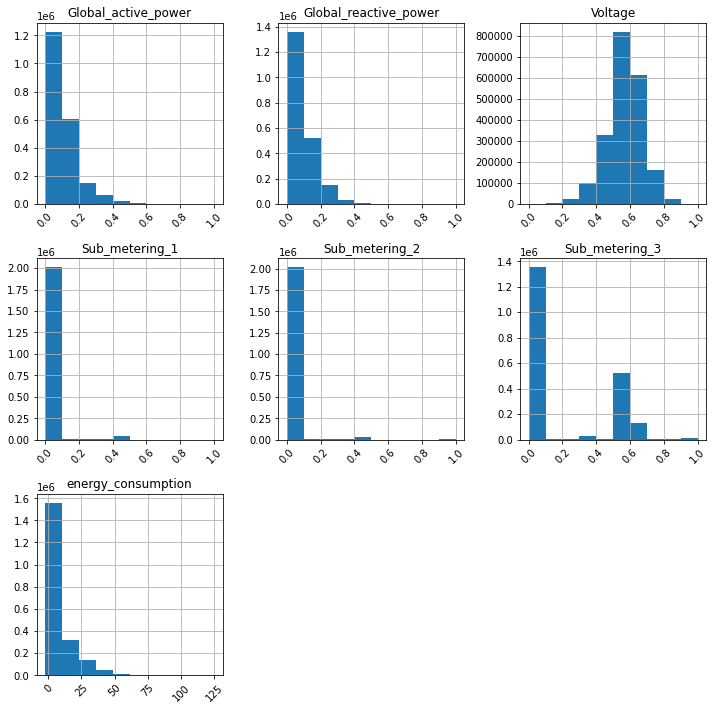

In [125]:
#Histplot to check the skewness
df1.hist(figsize=(12,12), xrot=45)
plt.show()

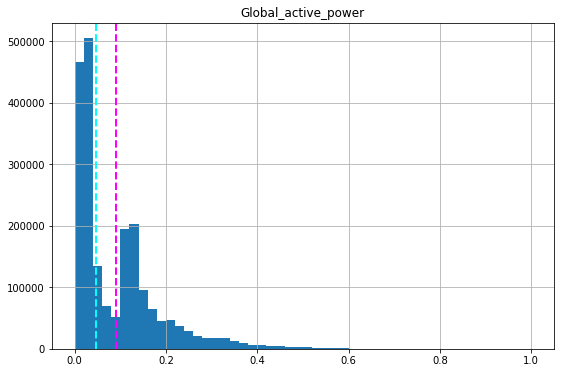

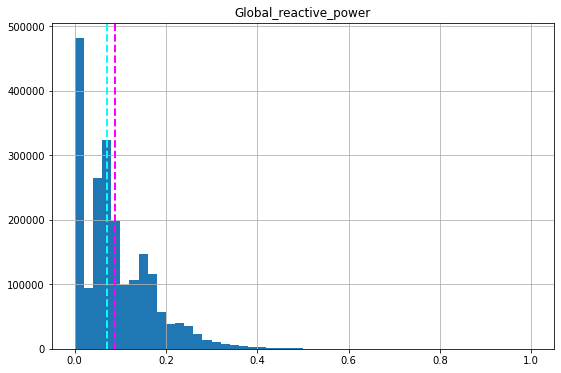

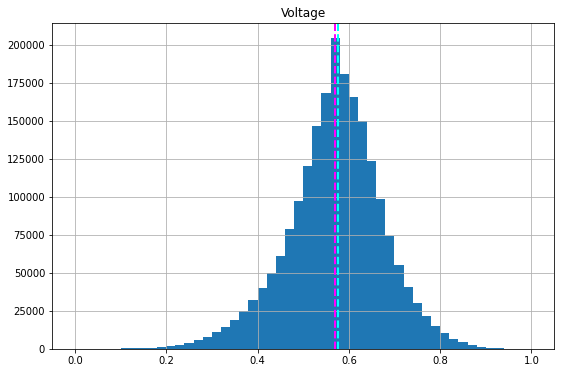

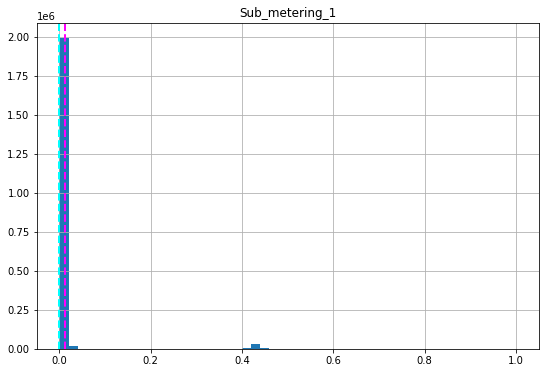

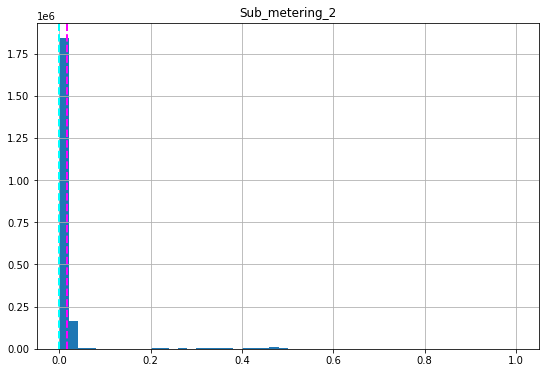

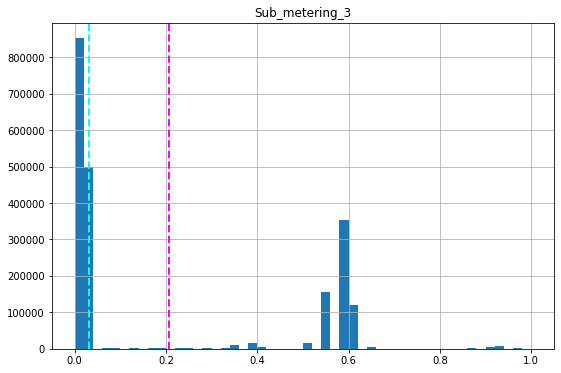

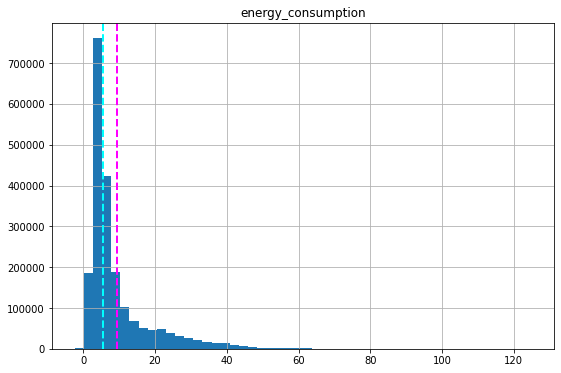

In [126]:
# plot a bar plot for each numerical feature count

numeric_features = df1.describe().columns
numeric_features
     
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df1[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()
     

In [118]:
#Train-Test split and training of model with training data.
X = df1.drop(["energy_consumption"],axis=1)
y = df1.energy_consumption
     

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_train = regr.predict(X_train)
y_pred_train 

array([10.9       ,  6.1       , 20.43333333, ...,  2.63333333,
        3.03333333,  4.83333333])

In [119]:
MSE_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, y_pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 3.182537501539979e-28
RMSE= 1.7839667882390576e-14
R2_Score= 1.0


In [121]:
#Train-Test split and training of model with training data.
X = df1.drop(["energy_consumption"],axis=1)
y = df1.energy_consumption
     

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_test = regr.predict(X_test)
y_pred_test

array([33.86666667, 17.83333333, 11.1       , ...,  5.16666667,
       30.9       , 21.2       ])

In [124]:
MSE_test = mean_squared_error(y_train, y_pred_train)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_train, y_pred_train)
print(f'R2_Score= {R2_Score_test}')

MSE= 3.182537501539979e-28
RMSE= 1.7839667882390576e-14
R2_Score= 1.0


In [132]:
#residual calculation for train data.
residuals = y_train.values-y_pred_train
print(residuals)
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

[7.10542736e-15 1.06581410e-14 7.10542736e-15 ... 2.13162821e-14
 1.95399252e-14 1.15463195e-14]
Mean of Residuals 1.5973570353574477e-14


In [134]:
#residual calculation for test data.
residuals_test = y_test.values-y_pred_test
print(residuals_test)
mean_residuals_test = np.mean(residuals_test)
print("Mean of Residuals_test {}".format(mean_residuals_test))

[2.13162821e-14 7.10542736e-15 1.59872116e-14 ... 1.86517468e-14
 0.00000000e+00 7.10542736e-15]
Mean of Residuals_test 1.598931242187561e-14


1336274    7.105427e-15
751372     1.065814e-14
1175859    7.105427e-15
358736     1.776357e-14
291347     1.065814e-14
               ...     
963395     1.421085e-14
117952     1.154632e-14
1484405    2.131628e-14
305711     1.953993e-14
2034348    1.154632e-14
Name: energy_consumption, Length: 1660207, dtype: float64


<ipython-input-136-5d95e347e4c1>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


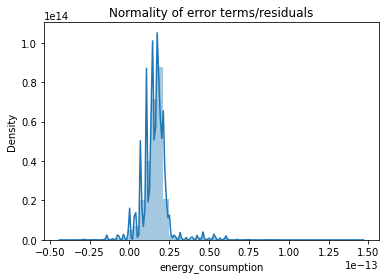

In [136]:
#Checking for distribution of residuals of train and test data.
# Residual calculation for train data Fit linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate residuals
residuals = y_train - model.predict(X_train)
print(residuals)


p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

677028     2.131628e-14
1770725    7.105427e-15
1378481    1.598721e-14
1819664    1.421085e-14
57829      1.065814e-14
               ...     
921037     7.105427e-15
438108     1.776357e-14
1025747    1.865175e-14
937646     0.000000e+00
1722513    7.105427e-15
Name: energy_consumption, Length: 415052, dtype: float64


<ipython-input-137-a6cd0fd6dabb>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals1,kde=True)


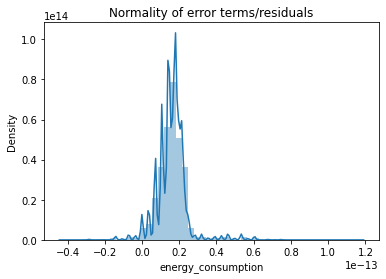

In [137]:
# Residual calculation for train data Fit linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate residuals
residuals1 = y_test - model.predict(X_test)
print(residuals1)


p = sns.distplot(residuals1,kde=True)
p = plt.title('Normality of error terms/residuals')